# Data Mining Project 3 - Link Analysis

### Requirements

- [x] PageRank algorithm implementation 1 - 7 graph
- [x] HITS implementation 1 - 7 graph
- [x] SimRank implementation 1 -5 graph
- [x] Using data from project 1 (transaction data)
- [ ] Modified graph and analysis

### Extra functionality

- Using pygraphviz for graph visualization
- Standardize the `main.py` making the program as tool

## Graph Dataset

1. graph_1.txt: 6 nodes, 5 edges
2. graph_2.txt: 5 nodes, 5 edges (a circle)
3. graph_3.txt: 4 nodes, 6 edges
4. graph_4.txt: 7 nodes, 18 edges (the example in Lecture3, p29)
5. graph_5.txt:  469 nodes, 1102 edges
6. graph_6.txt: 1228 nodes, 5220 edges (omitted for graph drawing)
7. graph_7.txt: 120 nodes, 6251 edges

### Ploting directional graph by pygraphviz (Graphviz)

By using the code below, we can visualize the graph from graph_x.txt

*For graph 5 and 6, there are too many nodes and edges to render, so we omit it*

In [42]:
import pygraphviz as pgv

if __name__ == "__main__":
    node_lengths = [6, 5, 4, 7]

    for i in range(len(node_lengths)):
        A = pgv.AGraph(directed=True)
        A.node_attr["shape"] = "circle"
        A.graph_attr["label"] = f"Graph {i + 1}"
        nodelist = [j + 1 for j in range(node_lengths[i])]
        A.add_nodes_from(nodelist)

        with open(f"data/graph_{i + 1}.txt", "r") as file_in:
            lines = file_in.readlines()
            for line in lines:
                items = line.strip().split(",")
                A.add_edge(items[0], items[1])

        A.layout(prog="dot")
        A.draw(f"graph/graph_{i + 1}.png")


### Advantage of plotting the actual graph
* We can edit the graph, add edge on these graph to analysis the change on the score of PageRank or HITS' authorities and hubs

### Graph 1

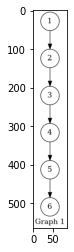

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline  

graph1 = plt.imread("graph/graph_1.png")
plt.imshow(graph1)

### Graph 2


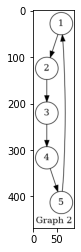

In [13]:
graph2 = plt.imread("graph/graph_2.png")
plt.imshow(graph2)

### Graph 3

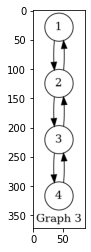

In [15]:
graph3 = plt.imread("graph/graph_3.png")
plt.imshow(graph3)

### Graph 4

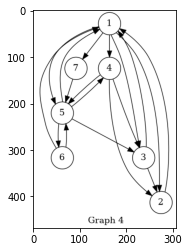

In [16]:
graph4 = plt.imread("graph/graph_4.png")
plt.imshow(graph4)

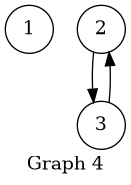

In [30]:
from IPython.display import Image
def draw(dot):
    return Image(dot.draw(format='png', prog='dot'))
draw(A)

A.add_edge("2", "3")
draw(A)

A.add_edge("3", "2")
draw(A)

A.add_edge("2", "3")
draw(A)

## Graph 7

For this project, we have to do one more graph (graph 7) from project 1 dataset, which is generated by the IBM quest data generator, the data needs to farther process to match the `graph_x.txt` format, then apply the PageRank and HITS algorithm on it.

### Randomly assign forward direction, backward direction and bidirection to the transaction rows

By using `random.choice`, we can generate the new `graph_7.txt`

In [46]:
import random


def generate_graph_7(filename, output_file):
    """Generate graph from project 1 transaction data `kaggle dataset`."""

    with open(filename, "r") as filein:
        lines = filein.readlines()
        filein.close()            
        
    with open(output_file, "a+") as fileout:
        ibm_data = [
            [token for token in line.strip().split(" ") if token]
            for line in lines
        ]
        
        data_dict = {}
        for tx in ibm_data:
            if tx[0] in data_dict:
                data_dict[tx[0]].append(tx[2])
            else:
                data_dict[tx[0]] = [tx[2]]
        
        for row in data_dict.values():
            for i in range(1, len(row)):
                direction = random.choice(["-->", "<-->", "<--"])
                if direction == "-->":
                    fileout.write(f"{row[i - 1]},{row[i]}\n")
                elif direction == "<-->":
                    fileout.write(f"{row[i - 1]},{row[i]}\n")
                    fileout.write(f"{row[i]},{row[i - 1]}\n")
                elif direction == "<--":
                    fileout.write(f"{row[i]},{row[i - 1]}\n")
        
        fileout.close()

        
generate_graph_7("ibm.txt", "data/graph_7.txt")

### Determine the nodes of the data

Although in project 1, data description is known, but I still implement a function to determine dataset's nodes and its length, and length of the edges. 

In [37]:
def calculate_nodes(filename):
    with open(filename, "r") as filein:
        lines = filein.readlines()
        nodes = set({})
        for line in lines:
            nodes = nodes.union({node for node in line.strip().split(",")})
        filein.close()
        return nodes
        
calculate_nodes("data/graph_7.txt")

{'0',
 '1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '7',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '8',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '9',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99'}

### Apply algorithm

After data preprocessing, run both PageRank and HITS algorithms on the `graph_7.txt`.

*Results are generated in output folder as requirement from this project*

In [41]:
import numpy as np
from algorithm.pagerank import pagerank
from algorithm.hits import hits


# create numpy matrix
node_length = len(calculate_nodes("data/graph_7.txt"))

matrix = np.zeros(tuple([node_length] * 2))

with open(f"data/graph_7.txt", "r") as file_in:
    lines = file_in.readlines()
    lines = list(set(lines))
    for line in lines:
        items = line.strip().split(",")
        matrix[int(items[0])][int(items[1])] = 1

# doing PageRank
rank = pagerank(matrix)
np.savetxt(f"output/graph_7_PageRank.txt", rank, newline=" ", fmt="%.8g")

# doing HITS
authorities, hubs = hits(matrix)
np.savetxt(f"output/graph_7_HITS_authority.txt", authorities, newline=" ", fmt="%.8g")
np.savetxt(f"output/graph_7_HITS_hub.txt", hubs, newline=" ", fmt="%.8g")